<a href="https://colab.research.google.com/github/parvezk/tdi-capstone-project/blob/master/mv_collision_bigQuery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%%bigquery --project dti-capstone-1 df1
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.new_york.nypd_mv_collisions`

,total_rows
0,1196940


In [4]:
df1

,total_rows
0,1196940


In [0]:
project_id = 'dti-capstone-1'

In [6]:
project_id

'dti-capstone-1'

In [8]:
from google.cloud import bigquery

project_id = 'dti-capstone-1'
client = bigquery.Client(project=project_id)

for dataset in client.list_datasets():
  print(dataset.dataset_id)

new_york_mv_collisions_2012
nypd_mv_collision_2019


In [19]:
project_id = 'dti-capstone-1'

client = bigquery.Client(project=project_id)

df = client.query('''
  SELECT 
    *
  FROM `bigquery-public-data.new_york.nypd_mv_collisions`''').to_dataframe()

In [20]:
df.shape

(1196940, 28)

In [33]:
df.head()

,borough,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,cross_street_name,timestamp,latitude,longitude,...,number_of_persons_killed,off_street_name,on_street_name,unique_key,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,zip_code
0,QUEENS,Outside Car Distraction,Unspecified,,,,GREENWAY SOUTH,2018-01-17 10:35:00+00:00,40.710400,-73.839740,...,0,,UNION TURNPIKE,3830694,SPORT UTILITY / STATION WAGON,AM,,,,11375.0
1,MANHATTAN,Fatigued/Drowsy,Other Vehicular,,,,3 AVENUE,2015-05-08 17:30:00+00:00,40.780125,-73.953034,...,0,,EAST 88 STREET,3216563,PASSENGER VEHICLE,MOTORCYCLE,,,,10128.0
2,QUEENS,Driver Inattention/Distraction,Unspecified,,,,,2017-11-22 07:15:00+00:00,40.685524,-73.844600,...,0,99-08 97 STREET,,3795174,PASSENGER VEHICLE,CONV,,,,11416.0
3,BRONX,Turning Improperly,Unspecified,,,,WESTCHESTER AVENUE,2017-12-05 07:30:00+00:00,40.832650,-73.863660,...,0,,LELAND AVENUE,3803160,PASSENGER VEHICLE,BU,,,,10472.0
4,BRONX,Driver Inattention/Distraction,Unspecified,,,,,2017-11-03 09:22:00+00:00,40.853233,-73.891750,...,0,4487 3 AVENUE,,3794016,PASSENGER VEHICLE,TK,,,,10457.0


In [0]:
%matplotlib inline

In [26]:
%%bigquery --project dti-capstone-1 selective
SELECT
  on_street_name,
  SUM(number_of_persons_killed) AS deaths
FROM
  `bigquery-public-data.new_york.nypd_mv_collisions`
WHERE
  on_street_name <> ''
GROUP BY
  on_street_name
ORDER BY
  deaths DESC
LIMIT
  10

,on_street_name,deaths
0,BROADWAY,23
1,ATLANTIC AVENUE,22
2,LINDEN BOULEVARD,16
3,HYLAN BOULEVARD,16
4,NORTHERN BOULEVARD,15
5,BRUCKNER BOULEVARD,15
6,3 AVENUE,15
7,ROCKAWAY BOULEVARD,14
8,FLATBUSH AVENUE,13
9,QUEENS BOULEVARD,12


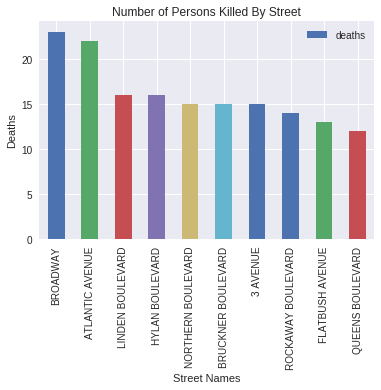

In [41]:
pax = selective.plot(kind='bar', x='on_street_name', y='deaths');
pax.set_title('Number of Persons Killed By Street')
pax.set_xlabel('Street Names')
pax.set_ylabel('Deaths');

In [64]:
%%bigquery --project dti-capstone-1 collisions
SELECT
  contributing_factor_vehicle_1 AS collision_factor,
  COUNT(*) num_collisions
FROM
  `bigquery-public-data.new_york.nypd_mv_collisions`
WHERE
  contributing_factor_vehicle_1 != "Unspecified"
  AND contributing_factor_vehicle_1 != ""
GROUP BY
  1
ORDER BY
  num_collisions DESC
LIMIT 20

,collision_factor,num_collisions
0,Driver Inattention/Distraction,176170
1,Failure to Yield Right-of-Way,57298
2,Fatigued/Drowsy,48495
3,Backing Unsafely,37916
4,Other Vehicular,36038
5,Following Too Closely,31636
6,Turning Improperly,29288
7,Lost Consciousness,20261
8,Traffic Control Disregarded,16190
9,Prescription Medication,15904


In [0]:
desc = collisions['collision_factor']
sizes = collisions['num_collisions']

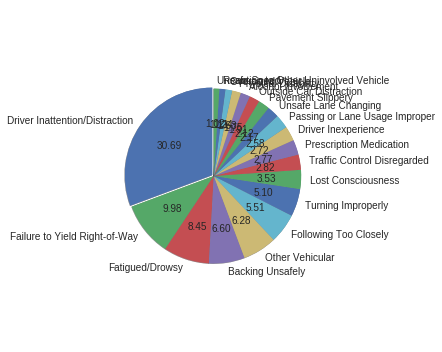

In [98]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)

ax1.pie(sizes, explode=explode, labels=desc, autopct='%1.2f',
        radius=5.0, shadow=True, startangle=90,
       #wedgeprops   = { 'linewidth' : 0.5, 'edgecolor' : "white" }
       )


ax1.axis('equal')
plt.tight_layout()
plt.show()

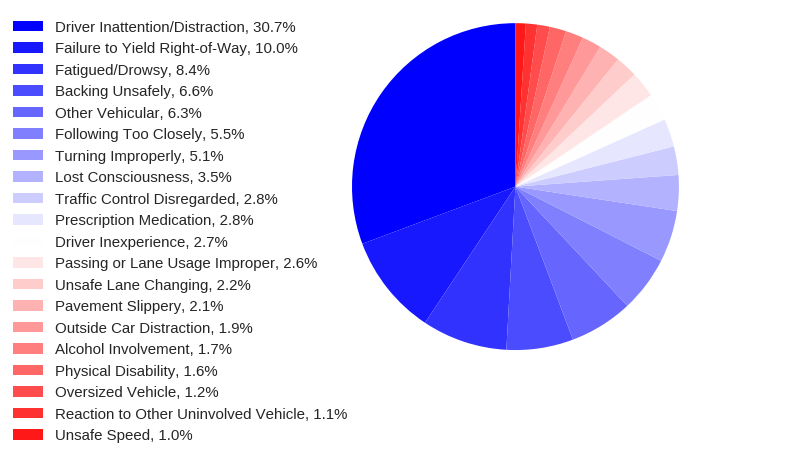

In [113]:


fig1, ax1 = plt.subplots(figsize=(11, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(desc, sizes)],
    prop={'size': 15},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()